## Сортировка пузырьком

In [44]:
import numpy as np
import time
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [2]:
def bubbleSort(arr):
    n = len(arr)
    for i in range(n-1):
        for j in range(n-i-1):
            if arr[j] > arr[j+1]:
                arr[j], arr[j+1] = arr[j+1], arr[j]
    return arr

In [9]:
arr = np.random.randint(0, 9, 10)
print(arr)
print(bubbleSort(arr))

[6 2 8 5 7 4 5 4 2 8]
[2 2 4 4 5 5 6 7 8 8]


In [10]:
%%time
n = 10
x = list(range(n, 0, -1))
bubbleSort(x)

2.5699999980588473e-05
Wall time: 0 ns


| n     | t        |
|-------|----------|
| 100   | 1e+03 µs |
| 1000  | 87 ms    |
| 10000 | 9.68 s   |

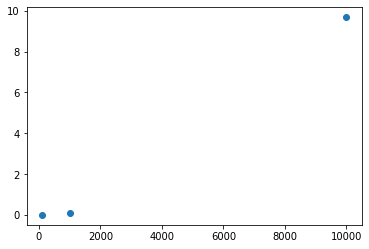

In [14]:
n = [100, 1000, 10000]
t = [1000e-6, 87e-3, 9.68]
plt.scatter(n, t)
plt.show()

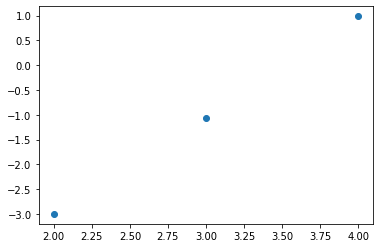

In [15]:
lg_n = np.log10(n)
lg_t = np.log10(t)

plt.scatter(lg_n, lg_t)
plt.show()

## Вычислительный эксперемент

In [17]:
n_lst = range(1000, 6000, 200)

#Пустые списки для размера данных и времени вычислений
ti=[]
nn=[]
# В цикле перебираем значения п
for n in n_lst:
  print(f"\n{n}:", end="")
  # В цикле делаем по 10 погонов для каждого п
  for i in range(10):
    print(i, end="")
    x = list(range(n,0, -1))
    # Фиксируем время начала расчетов
    start_time = time.time()
    # Вызываем нашу функцию при заданном п
    m = bubbleSort(x)
    #Фиксируем время окончания расчетов
    end_time = time.time()
    # Находим продолжительность расчетов
    total_time = end_time - start_time
    # Собираем результаты измерений в списки
    nn.append(n)
    ti.append(total_time)


1000:0123456789
1200:0123456789
1400:0123456789
1600:0123456789
1800:0123456789
2000:0123456789
2200:0123456789
2400:0123456789
2600:0123456789
2800:0123456789
3000:0123456789
3200:0123456789
3400:0123456789
3600:0123456789
3800:0123456789
4000:0123456789
4200:0123456789
4400:0123456789
4600:0123456789
4800:0123456789
5000:0123456789
5200:0123456789
5400:0123456789
5600:0123456789
5800:0123456789

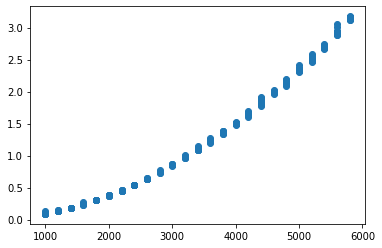

In [18]:
plt.scatter(nn,ti)
plt.show()

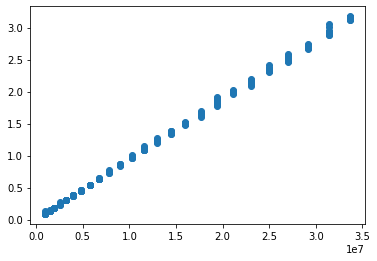

In [19]:
plt.scatter(np.array(nn)**2, ti)
plt.show()

In [24]:
nn[:10], ti[:10]

([1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000],
 [0.08805513381958008,
  0.09094476699829102,
  0.08800053596496582,
  0.12899422645568848,
  0.09499883651733398,
  0.08999967575073242,
  0.10100722312927246,
  0.10299181938171387,
  0.0930013656616211,
  0.09200668334960938])

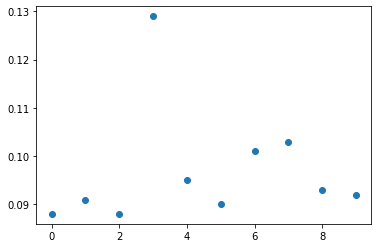

In [28]:
plt.scatter(range(10), ti[:10])
plt.show()

In [23]:
print(np.median(ti[:10]))

0.09250402450561523


In [25]:
nn[10:20], ti[10:20]

([1200, 1200, 1200, 1200, 1200, 1200, 1200, 1200, 1200, 1200],
 [0.13300466537475586,
  0.1449873447418213,
  0.14600014686584473,
  0.14100027084350586,
  0.13499999046325684,
  0.13299989700317383,
  0.13100051879882812,
  0.13100075721740723,
  0.13199925422668457,
  0.13300180435180664])

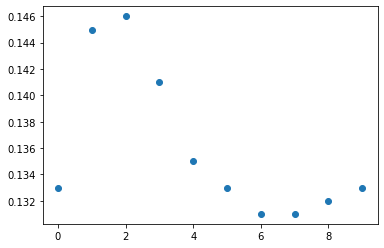

In [26]:
plt.scatter(range(10), ti[10:20])
plt.show()

In [40]:
len(nn)/10

25.0

In [41]:
tm = []
nm = []
for i in range(25):
    tm += [np.median(ti[i*10 : (i + 1) * 10])]
    nm += [nn[i * 10]]

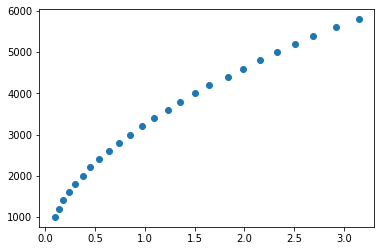

In [42]:
plt.scatter(tm, nm)
plt.show()

In [45]:
lin_mod = LinearRegression()
n = (np.array(nm)**2).reshape(-1, 1)
lin_mod.fit(n, tm)

LinearRegression()

In [46]:
t_predict = lin_mod.predict(n)

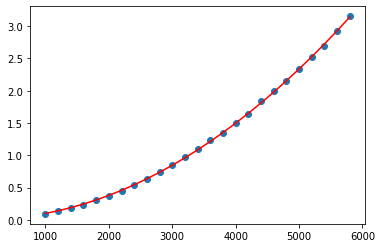

In [47]:
plt.scatter(nm, tm)
plt.plot(nm, t_predict, color='red')
plt.show()

In [48]:
lin_mod.coef_

array([9.31271622e-08])

In [49]:
lin_mod.intercept_

0.0069257173385837145

In [51]:
print(f"T(n) = {lin_mod.intercept_:.3e} + {lin_mod.coef_[0]:.3e} * n^2")

T(n) = 6.926e-03 + 9.313e-08 * n^2


**Выводы**

Длительность сортировки методом пузырька возрастает пропорционально квадрату размера исходного массива чисел $n$.

Вычислительная сложность сортировки пузырьком $O(n^2)$.

Эксперементально получена следующая зависимость:

$$T(n) = 6.926\cdot10^{-3} + 9.313\cdot10^{-8} \cdot n^2$$

## Сортировка...